# ~ Danfoss Power Solutions
# ~ Maintenance Analysis Report
# ~ Predictive Maintenance Project

# Importing Libraries & DataSet Preview

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

In [2]:
df = pd.read_excel("Maintenance Without Problem and Solution.xlsx")

In [3]:
df.head()

,Day,Month,Year,Shift,Location Description,Asset Description,Total Down Time(Mins),Type of Work
0,2.0,JAN,2024.0,A,CH02,Test Rig D1,30.0,B/D
1,2.0,JAN,2024.0,A,PDI line,PDI Assembly & PDI Packing CH01 Line 1,60.0,B/D
2,2.0,JAN,2024.0,A,CH03,Assembly station 3,60.0,B/D
3,2.0,JAN,2024.0,A,CH06,Durr Ultrasonic,30.0,B/D
4,2.0,JAN,2024.0,A,CH04,Test Rig F2,30.0,B/D


# Converting Day Month Year Into Date Column

In [4]:
df = df.rename(columns={
    'Location Description': 'location',
    'Asset Description': 'asset',
    'Action Taken': 'action',
    'Total Down Time(Mins)': 'down_time_in_mins',
    'Type of  Work': 'work_type',
    'Problem': 'problem',
})

In [5]:
month_mapping = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
    'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}

# Map month names to numbers
df['Month'] = df['Month'].map(month_mapping)

# Combine Day, Month, Year into a single Date column
df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Drop the original Day, Month, and Year columns if desired
df.drop(columns=['Day', 'Month', 'Year'], inplace=True)

In [6]:
df.head()

,Shift,location,asset,down_time_in_mins,work_type,date
0,A,CH02,Test Rig D1,30.0,B/D,2024-01-02
1,A,PDI line,PDI Assembly & PDI Packing CH01 Line 1,60.0,B/D,2024-01-02
2,A,CH03,Assembly station 3,60.0,B/D,2024-01-02
3,A,CH06,Durr Ultrasonic,30.0,B/D,2024-01-02
4,A,CH04,Test Rig F2,30.0,B/D,2024-01-02


# MetaData & Handling Null Values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3091 entries, 0 to 3090
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Shift              3088 non-null   object        
 1   location           3088 non-null   object        
 2   asset              3088 non-null   object        
 3   down_time_in_mins  2993 non-null   float64       
 4   work_type          3088 non-null   object        
 5   date               3088 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 145.0+ KB


In [8]:
df.isnull().sum()

Shift                 3
location              3
asset                 3
down_time_in_mins    98
work_type             3
date                  3
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Shift                0
location             0
asset                0
down_time_in_mins    0
work_type            0
date                 0
dtype: int64

In [11]:
df.head()

,Shift,location,asset,down_time_in_mins,work_type,date
0,A,CH02,Test Rig D1,30.0,B/D,2024-01-02
1,A,PDI line,PDI Assembly & PDI Packing CH01 Line 1,60.0,B/D,2024-01-02
2,A,CH03,Assembly station 3,60.0,B/D,2024-01-02
3,A,CH06,Durr Ultrasonic,30.0,B/D,2024-01-02
4,A,CH04,Test Rig F2,30.0,B/D,2024-01-02


In [12]:
trim_spaces = lambda x: x.strip() if isinstance(x, str) else x

# Apply trim_spaces to all columns except 'Problem' and 'Action'
df.loc[:, df.columns.difference(['problem', 'action'])] = df.loc[:, df.columns.difference(['problem', 'action'])].applymap(trim_spaces)

In [13]:
df.head()

,Shift,location,asset,down_time_in_mins,work_type,date
0,A,CH02,Test Rig D1,30.0,B/D,2024-01-02
1,A,PDI line,PDI Assembly & PDI Packing CH01 Line 1,60.0,B/D,2024-01-02
2,A,CH03,Assembly station 3,60.0,B/D,2024-01-02
3,A,CH06,Durr Ultrasonic,30.0,B/D,2024-01-02
4,A,CH04,Test Rig F2,30.0,B/D,2024-01-02


# List Of All Maintenance Locations

In [14]:
total_unique_locations = df['location'].nunique()
print("Total number of unique locations:", total_unique_locations)

Total number of unique locations: 24


In [15]:
unique_locations = df['location'].unique()

# Order them in alphabetical order
sorted_unique_locations = sorted(unique_locations)

unique_locations = df['location'].unique()

# Order them in alphabetical order
sorted_unique_locations = sorted(unique_locations)

# Divide the sorted list into two equal parts
half_len = len(sorted_unique_locations) // 2
first_column = sorted_unique_locations[:half_len]
second_column = sorted_unique_locations[half_len:]

# Print the two columns side by side
for location1, location2 in zip(first_column, second_column):
    print("{: <40} {: <}".format(location1, location2))

BV LINE                                  Milipore Room
CH01                                     PDI line
CH02                                     PVG
CH03                                     PVLP
CH04                                     PVM
CH05                                     SS01
CH06                                     SS02
GS01                                     SS03
GS02                                     SS04
GS03                                     SS05
GS04                                     Store
GS05                                     Tool Room


# List Of All Assets Available

In [16]:
total_unique_assets = df['asset'].nunique()
print("Total number of unique assets:", total_unique_assets)

Total number of unique assets: 100


In [17]:
unique_assets = df['asset'].unique()

# Order them in alphabetical order
sorted_unique_assets = sorted(unique_assets)

# Divide the sorted list into two equal parts
half_len = len(sorted_unique_assets) // 2
first_column = sorted_unique_assets[:half_len]
second_column = sorted_unique_assets[half_len:]

# Print the two columns side by side
for asset1, asset2 in zip(first_column, second_column):
    print("{: <40} {: <}".format(asset1, asset2))

Assembly station 1                       Klein 1
Assembly station 2                       Klein 2
Assembly station 3                       Knoll Coolant System
Assembly station 4                       Micromatic Grinding
Assembly stations of CH01                Milipore Room
Assembly stations of CH02                Nissin
Assembly stations of CH03                PDI Assembly & PDI Packing CH01 Line 1
Assembly stations of CH04                PDI Assembly & PDI Packing Line 2
Assembly stations of CH05                PDI Line Cobot
Assembly stations of CH06                PV Assembly & Leak Testing
Automatic assembly                       PVG Assembly
BVLINE Assembly Station(Dual Stage)      PVG Test Stand
BVLINE Assembly Station(Single Stage)    PVM Assembly
BVLINE ECO 80 Assembly                   PVM Test Stand
BVLINE ECO 80 Test Stand                 Piston Coining
BVLINE NGCT Big                          Stahli S/F Grinding Machine 1
BVLINE Nitrogen Gas Generator Unit       Stahli S/

# List Of All Shifts

In [18]:
total_unique_Shifts = df['Shift'].nunique()
print("Total number of unique Shifts:", total_unique_Shifts)

Total number of unique Shifts: 4


In [19]:
# Define shift names
shift_names = {
    'A': 'First Shift',
    'B': 'Second Shift',
    'C': 'Night Shift',
    'G': 'General Shift'
}

unique_shifts = df['Shift'].unique()

# Order them in alphabetical order
sorted_unique_shifts = sorted(unique_shifts)

# Divide the sorted list into two equal parts
half_len = len(sorted_unique_shifts) // 2
first_column = sorted_unique_shifts[:half_len]
second_column = sorted_unique_shifts[half_len:]

# Print the two columns side by side
for shift1, shift2 in zip(first_column, second_column):
    print("{: <40} {: <}".format(shift1 + '-' + shift_names.get(shift1, 'Unknown'), shift2 + '-' + shift_names.get(shift2, 'Unknown')))

A-First Shift                            C-Night Shift
B-Second Shift                           G-General Shift


# List Of All Work Type

In [20]:
total_unique_work_type = df['work_type'].nunique()
print("Total number of unique work_type:", total_unique_work_type)

Total number of unique work_type: 6


In [21]:
unique_work_type = df['work_type'].unique()

# Order them in alphabetical order
sorted_unique_work_type = sorted(unique_work_type)

# Divide the sorted list into two equal parts
half_len = len(sorted_unique_work_type) // 2
first_column = sorted_unique_work_type[:half_len]
second_column = sorted_unique_work_type[half_len:]

# Print the two columns side by side
for work_type1, work_type2 in zip(first_column, second_column):
    print("{: <40} {: <}".format(work_type1, work_type2))

B/D                                      Plan work
No B/D                                   RCPS
PM                                       Setup


# Visualization Of Downtime Duration

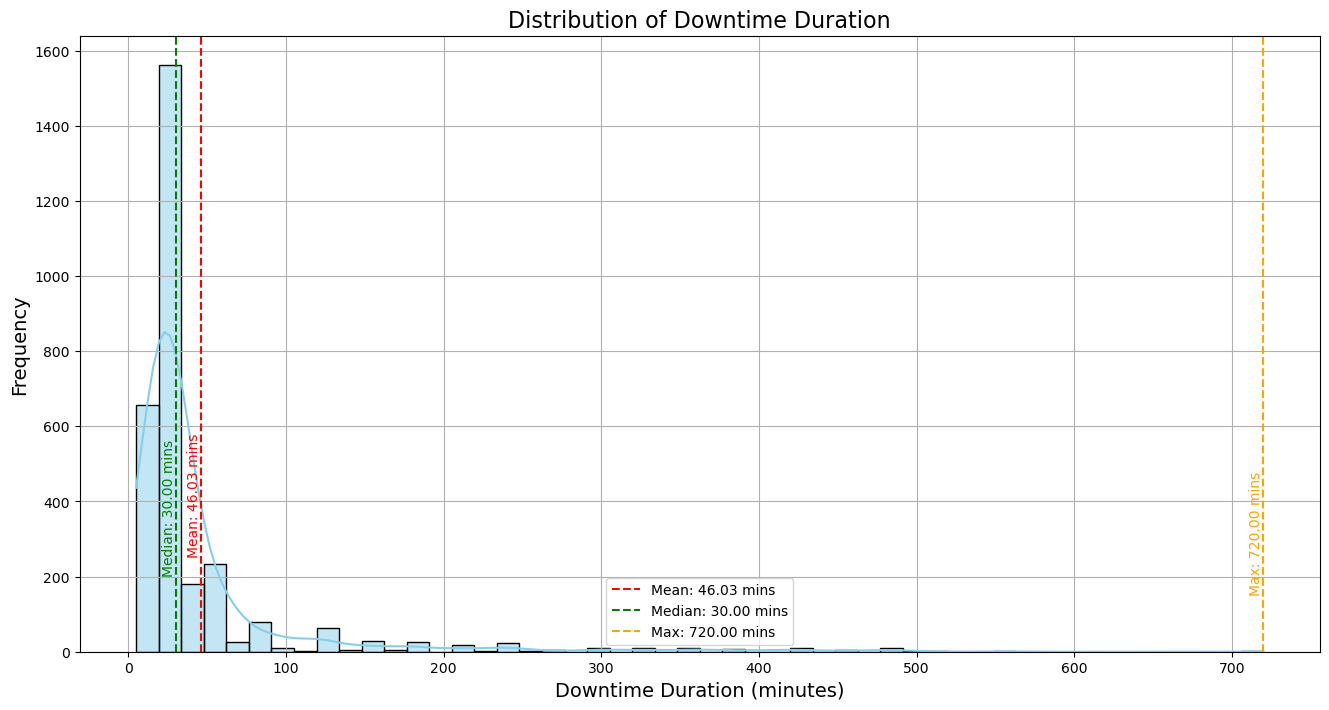

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate descriptive statistics
mean_downtime = df['down_time_in_mins'].mean()
median_downtime = df['down_time_in_mins'].median()
max_downtime = df['down_time_in_mins'].max()

# Visualize downtime distribution
plt.figure(figsize=(16, 8))
sns.histplot(df['down_time_in_mins'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Downtime Duration (minutes)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Downtime Duration', fontsize=16)
plt.grid(True)

# Add vertical lines for mean, median, and maximum
plt.axvline(mean_downtime, color='red', linestyle='--', label=f'Mean: {mean_downtime:.2f} mins')
plt.axvline(median_downtime, color='green', linestyle='--', label=f'Median: {median_downtime:.2f} mins')
plt.axvline(max_downtime, color='orange', linestyle='--', label=f'Max: {max_downtime:.2f} mins')

# Annotate statistical measures
plt.text(mean_downtime, 250, f'Mean: {mean_downtime:.2f} mins', rotation=90, va='bottom', ha='right', color='red')
plt.text(median_downtime, 200, f'Median: {median_downtime:.2f} mins', rotation=90, va='bottom', ha='right', color='green')
plt.text(max_downtime, 150, f'Max: {max_downtime:.2f} mins', rotation=90, va='bottom', ha='right', color='orange')

plt.legend()
plt.show()

# Visualize and Analyze Maintenance Frequency by Asset and Location

In [23]:
# Analyze maintenance frequency
maintenance_frequency = df.groupby(['asset', 'location']).size().reset_index(name='Frequency')
maintenance_frequency = maintenance_frequency.sort_values(by='Frequency', ascending=False).head(10)

print("Top 10 Maintenance Frequencies by Asset and Location:")
print()
print(maintenance_frequency)

Top 10 Maintenance Frequencies by Asset and Location:

                         asset location  Frequency
21   Assembly stations of CH03     CH03         80
222                 Test Rig C     CH02         69
240                Test Rig F2     CH04         65
87             Durr Ultrasonic     CH06         64
246                Test Rig G2     CH05         64
83             Durr Ultrasonic     CH02         64
177             Piston Coining     CH03         62
85             Durr Ultrasonic     CH04         62
64                   Cleantech     CH03         60
228                Test Rig E1     CH03         59


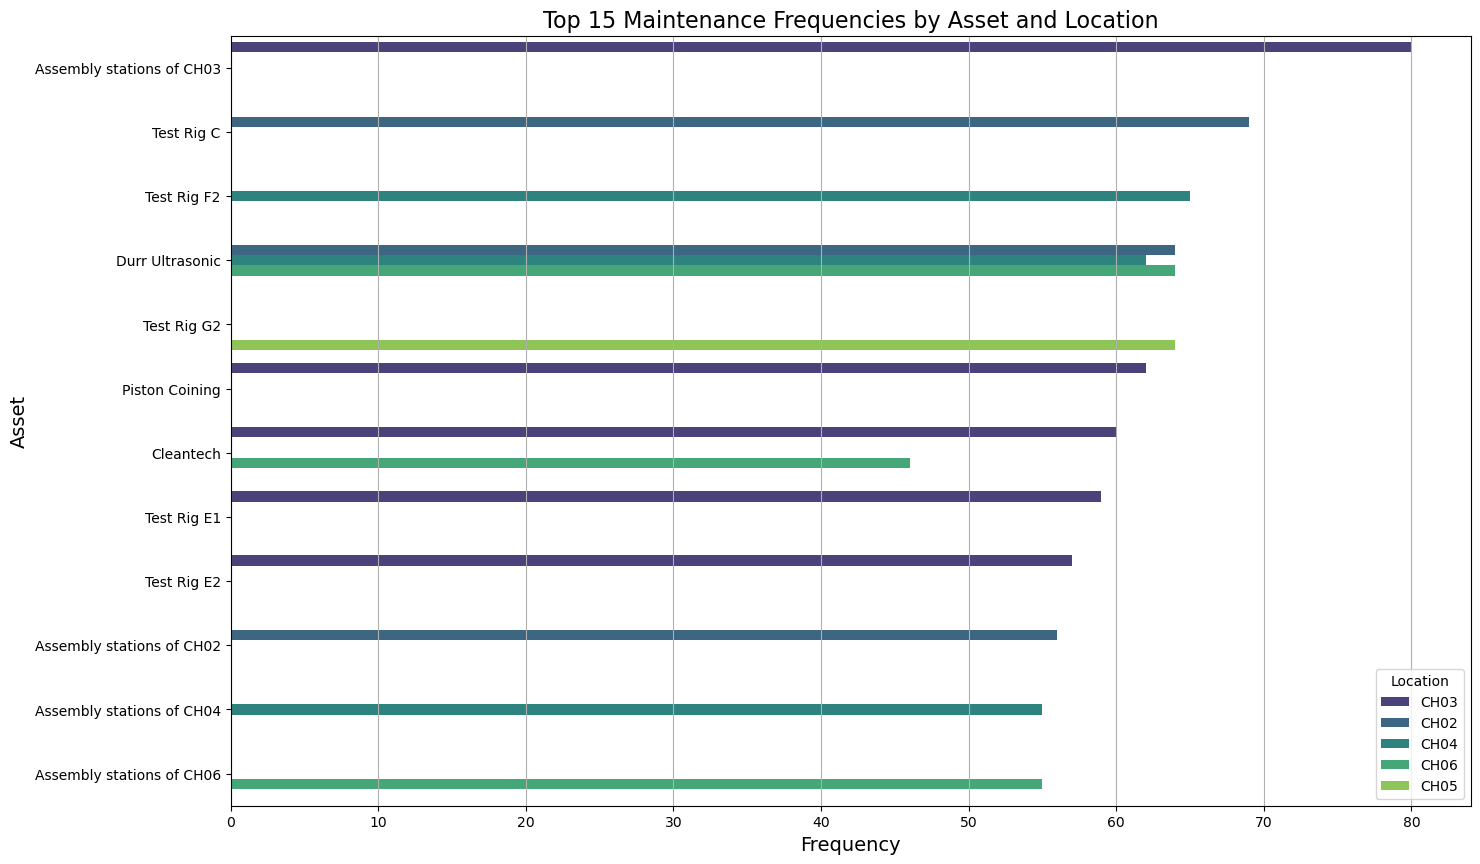

In [24]:
# Analyze maintenance frequency
maintenance_frequency = df.groupby(['asset', 'location']).size().reset_index(name='Frequency')
top_maintenance_frequency = maintenance_frequency.nlargest(15, 'Frequency')

plt.figure(figsize=(16, 10))
sns.barplot(data=top_maintenance_frequency, y='asset', x='Frequency', hue='location', palette='viridis')
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Asset', fontsize=14)
plt.title('Top 15 Maintenance Frequencies by Asset and Location', fontsize=16)
plt.legend(title='Location', loc='lower right')
plt.grid(axis='x')
plt.show()

# Visualize and Analyze Shift-wise Maintenance Patterns

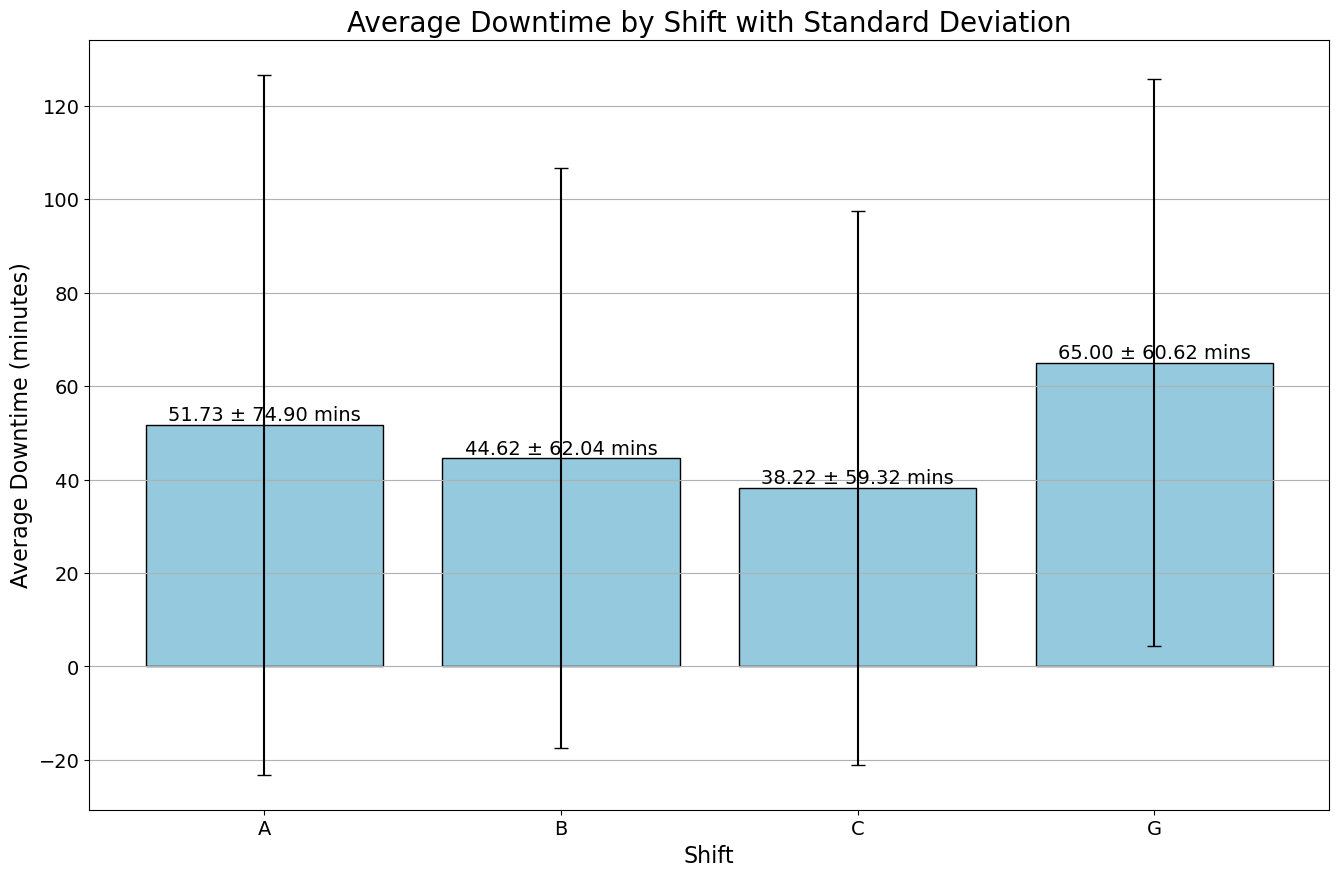

In [25]:
# Explore shift-wise maintenance patterns
shiftwise_downtime = df.groupby('Shift')['down_time_in_mins'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(16, 10))
sns.barplot(data=shiftwise_downtime, x='Shift', y='mean', color='skyblue', edgecolor='black')
plt.errorbar(x=shiftwise_downtime['Shift'], y=shiftwise_downtime['mean'], yerr=shiftwise_downtime['std'], fmt='none', ecolor='black', capsize=5)
plt.xlabel('Shift', fontsize=16)
plt.ylabel('Average Downtime (minutes)', fontsize=16)
plt.title('Average Downtime by Shift with Standard Deviation', fontsize=20)
plt.grid(axis='y')

# Add annotations
for index, row in shiftwise_downtime.iterrows():
    plt.text(index, row['mean'], f"{row['mean']:.2f} ± {row['std']:.2f} mins", ha='center', va='bottom', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Visualize and Analyze Downtime Distribution by Work Type

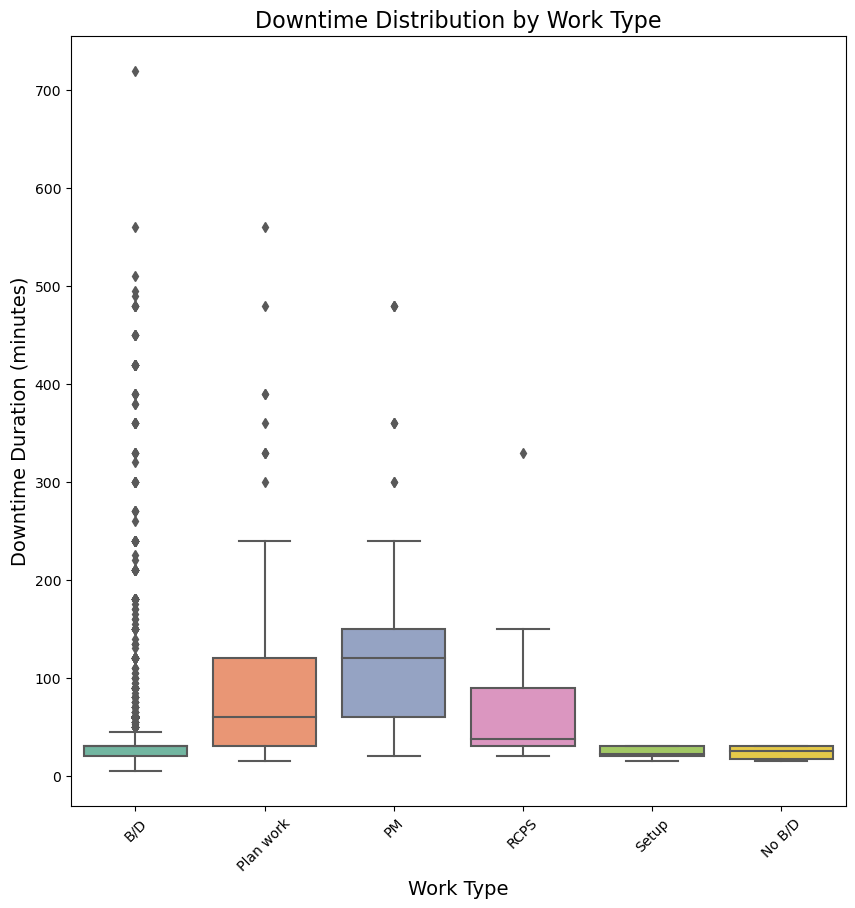

Downtime Distribution by Work Type:
            count        mean         std   min   25%    50%    75%    max
work_type                                                                 
B/D        2818.0   42.029099   61.598583   5.0  20.0   30.0   30.0  720.0
No B/D        7.0   23.571429    6.900656  15.0  17.5   25.0   30.0   30.0
PM           74.0  135.270270  108.488658  20.0  60.0  120.0  150.0  480.0
Plan work    62.0  119.435484  125.057707  15.0  30.0   60.0  120.0  560.0
RCPS         22.0   68.409091   68.563255  20.0  30.0   37.5   90.0  330.0
Setup        10.0   23.500000    6.258328  15.0  20.0   22.5   30.0   30.0


In [26]:
# Visualize downtime distribution by work type
plt.figure(figsize=(10, 10))
sns.boxplot(x='work_type', y='down_time_in_mins', data=df, palette='Set2')
plt.xlabel('Work Type', fontsize=14)
plt.ylabel('Downtime Duration (minutes)', fontsize=14)
plt.title('Downtime Distribution by Work Type', fontsize=16)
plt.xticks(rotation=45)
plt.show()

# Analyze downtime distribution by work type
print("Downtime Distribution by Work Type:")
print(df.groupby('work_type')['down_time_in_mins'].describe())

# Visualize and Analyze Downtime Distribution by Month

### January

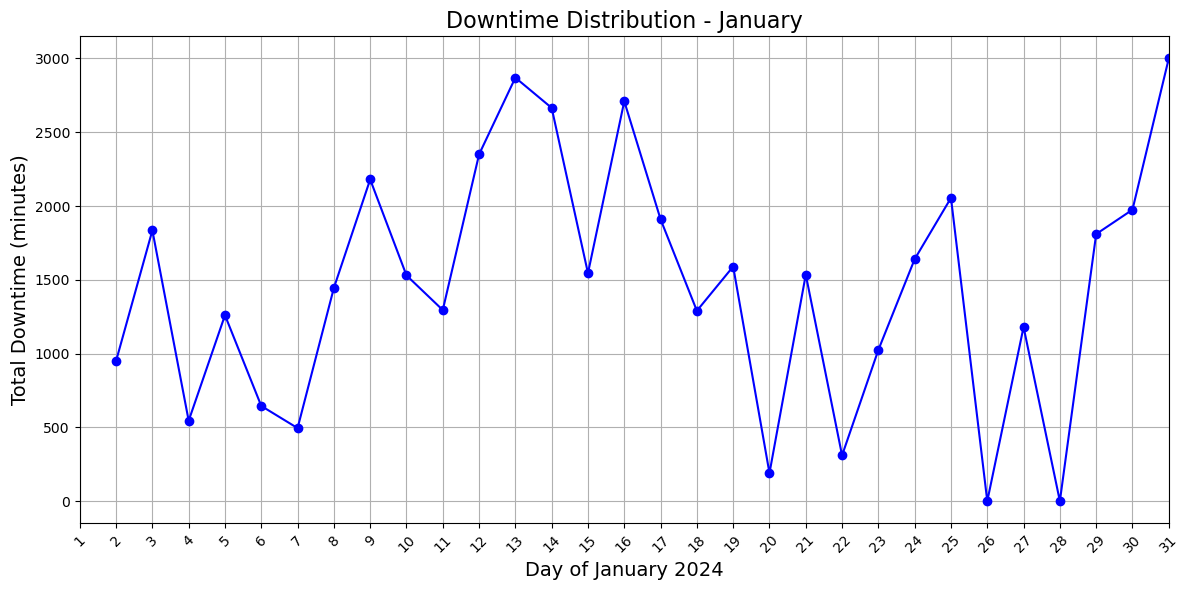

In [27]:
# Filter data for January
january_data = df[(df['date'].dt.month == 1)]

# Plot downtime distribution for January
group_downtime_january = january_data.set_index('date')['down_time_in_mins'].resample('D').sum()
plt.figure(figsize=(12, 6))
plt.plot(group_downtime_january.index.day, group_downtime_january.values, color='blue', marker='o')
plt.title('Downtime Distribution - January', fontsize=16)
plt.xlabel('Day of January 2024', fontsize=14)
plt.ylabel('Total Downtime (minutes)', fontsize=14)
plt.xticks(range(1, 32), rotation=45)
plt.xlim(1, calendar.monthrange(2024, 1)[1])  # Set x-axis limits
plt.grid(True)
plt.tight_layout()
plt.show()

### February

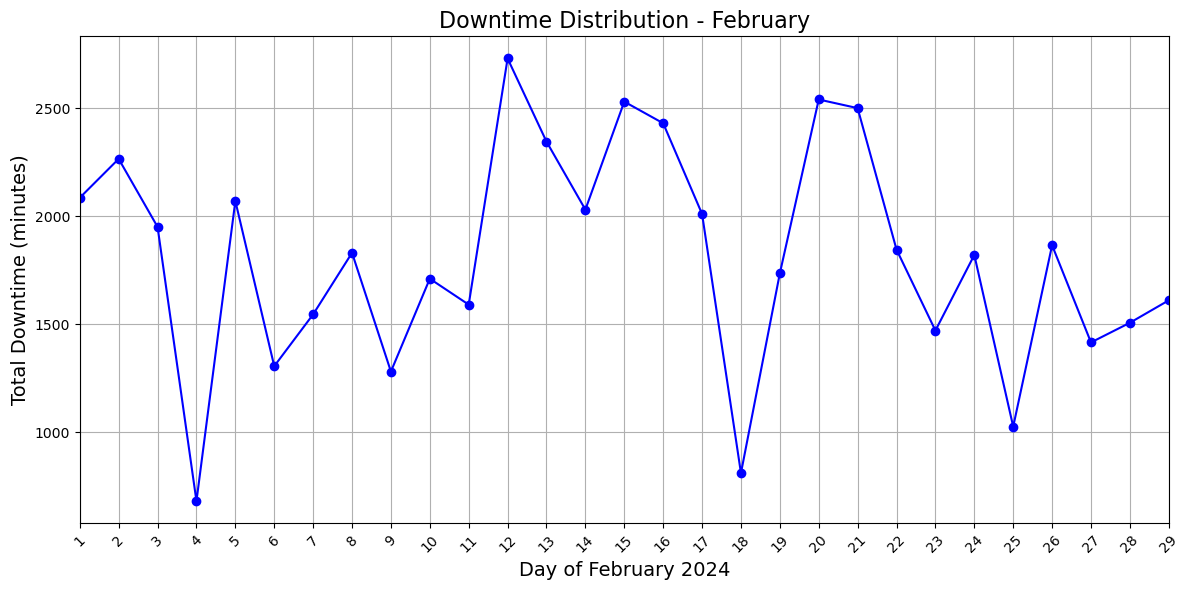

In [28]:
# Filter data for February
february_data = df[(df['date'].dt.month == 2)]

# Plot downtime distribution for February
group_downtime_february = february_data.set_index('date')['down_time_in_mins'].resample('D').sum()
plt.figure(figsize=(12, 6))
plt.plot(group_downtime_february.index.day, group_downtime_february.values, color='blue', marker='o')
plt.title('Downtime Distribution - February', fontsize=16)
plt.xlabel('Day of February 2024', fontsize=14)
plt.ylabel('Total Downtime (minutes)', fontsize=14)
plt.xticks(range(1, 30), rotation=45)
plt.xlim(1, calendar.monthrange(2024, 2)[1])  # Set x-axis limits
plt.grid(True)
plt.tight_layout()
plt.show()

### March

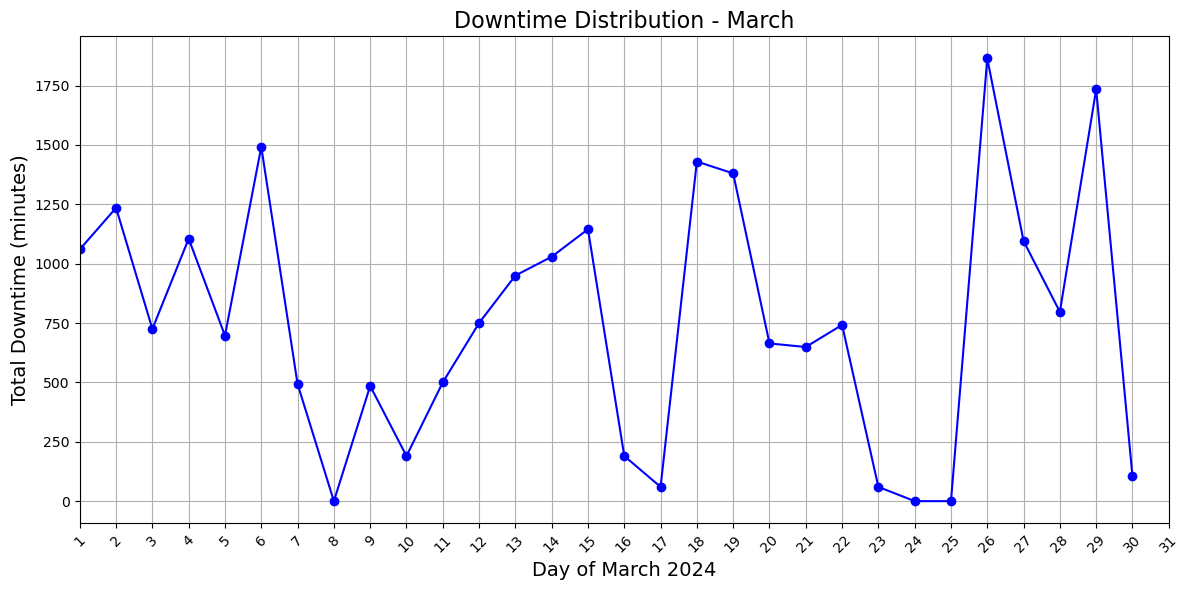

In [29]:
# Filter data for March
march_data = df[(df['date'].dt.month == 3)]

# Plot downtime distribution for March
group_downtime_march = march_data.set_index('date')['down_time_in_mins'].resample('D').sum()
plt.figure(figsize=(12, 6))
plt.plot(group_downtime_march.index.day, group_downtime_march.values, color='blue', marker='o')
plt.title('Downtime Distribution - March', fontsize=16)
plt.xlabel('Day of March 2024', fontsize=14)
plt.ylabel('Total Downtime (minutes)', fontsize=14)
plt.xticks(range(1, 32), rotation=45)
plt.xlim(1, calendar.monthrange(2024, 3)[1])  # Set x-axis limits
plt.grid(True)
plt.tight_layout()
plt.show()

### April

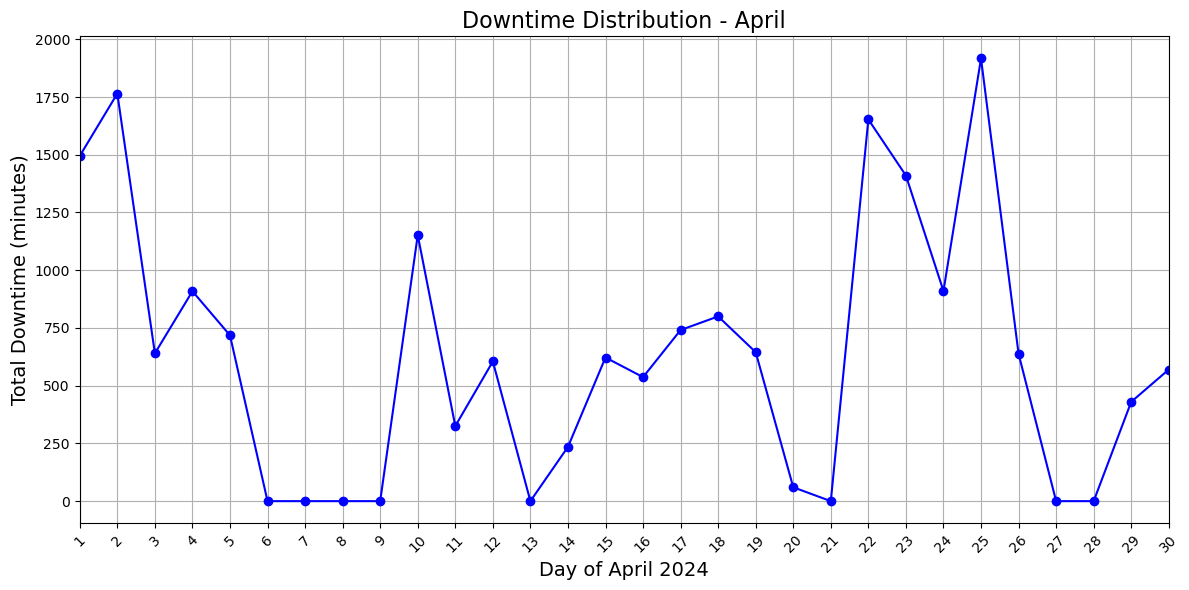

In [30]:
# Filter data for April
april_data = df[(df['date'].dt.month == 4)]

# Plot downtime distribution for April
group_downtime_april = april_data.set_index('date')['down_time_in_mins'].resample('D').sum()
plt.figure(figsize=(12, 6))
plt.plot(group_downtime_april.index.day, group_downtime_april.values, color='blue', marker='o')
plt.title('Downtime Distribution - April', fontsize=16)
plt.xlabel('Day of April 2024', fontsize=14)
plt.ylabel('Total Downtime (minutes)', fontsize=14)
plt.xticks(range(1, 31), rotation=45)
plt.xlim(1, calendar.monthrange(2024, 4)[1])  # Set x-axis limits
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature Selection & Label Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in ['Shift', 'location', 'asset', 'work_type']:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [32]:
df.tail()

,Shift,location,asset,down_time_in_mins,work_type,date
3086,1,6,33,15.0,0,2024-04-30
3087,2,1,33,15.0,0,2024-04-30
3088,2,4,93,35.0,0,2024-04-30
3089,2,6,99,15.0,0,2024-04-30
3090,2,1,33,20.0,0,2024-04-30


In [33]:
from sklearn.feature_selection import SelectKBest, f_regression

# Perform feature selection
X = df.drop(['down_time_in_mins', 'date'], axis=1)
y = df['down_time_in_mins']
selector = SelectKBest(score_func=f_regression, k='all')
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support(indices=True)]
print("Selected features:", selected_features)

Selected features: Index(['Shift', 'location', 'asset', 'work_type'], dtype='object')


# Model Building

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error

# Step 1: Data Preprocessing
SS
df.dropna(inplace=True)

# Label encoding for categorical variables
label_encoders = {}
for col in ['Shift', 'location', 'asset', 'work_type']:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Split the dataset into features (X) and target variable (y)
X = df.drop(['down_time_in_mins', 'date'], axis=1)
y = df['down_time_in_mins']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# Define the deep learning model with early stopping
def create_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Create the model
input_shape = X_train_scaled.shape[1]
dl_model = create_model(input_shape)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
# Train the deep learning model and capture the history
history = dl_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5808.6851 - mae: 40.0828 - val_loss: 4154.1323 - val_mae: 34.2361
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5877.7144 - mae: 37.7031 - val_loss: 4094.0129 - val_mae: 33.7551
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4910.3149 - mae: 35.9178 - val_loss: 4017.8870 - val_mae: 31.9372
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4715.8267 - mae: 33.9758 - val_loss: 3982.9270 - val_mae: 30.8333
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4106.5132 - mae: 31.8459 - val_loss: 3960.4275 - val_mae: 30.3946
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6007.9951 - mae: 38.4035 - val_loss: 3960.1997 - val_mae: 28.6906
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4660.6074 - mae: 33.7291 - val_loss: 3942.9551 - val_mae: 28.6556
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5461.2764 - mae: 34.7901 - val_loss: 3940.5090 - val_mae: 28.0625
Epoch 9/

In [37]:
# Predict downtime duration using the trained deep learning model
y_pred_dl = dl_model.predict(X_test_scaled)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [38]:
# Evaluate the deep learning model
mse_dl = mean_squared_error(y_test, y_pred_dl)
print("Mean Squared Error (Deep Learning):", mse_dl)

Mean Squared Error (Deep Learning): 3947.7153708105457


# Prediction Vs Actual Downtimes (Validation)

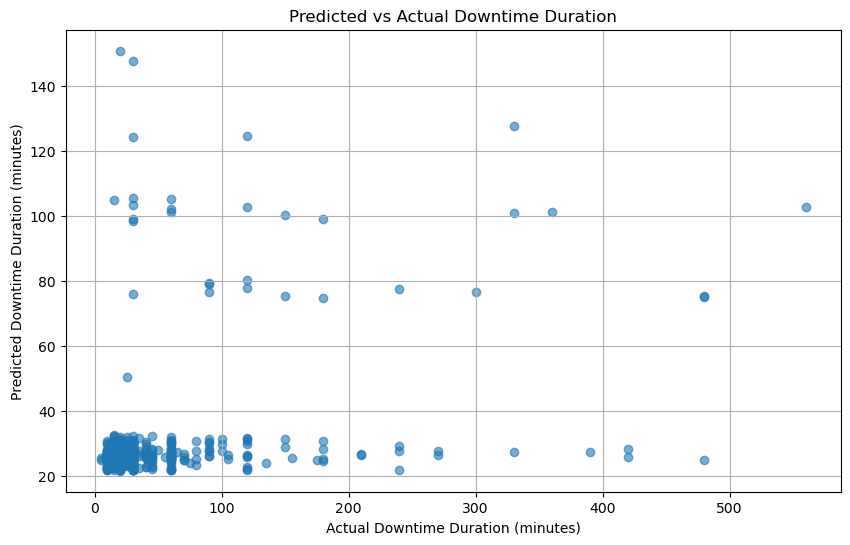

In [39]:
# Scatter plot of predicted vs actual downtime duration
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dl, alpha=0.6)
plt.xlabel('Actual Downtime Duration (minutes)')
plt.ylabel('Predicted Downtime Duration (minutes)')
plt.title('Predicted vs Actual Downtime Duration')
plt.grid(True)
plt.show()# Visualizations And Charts

# Plotting Of Losses

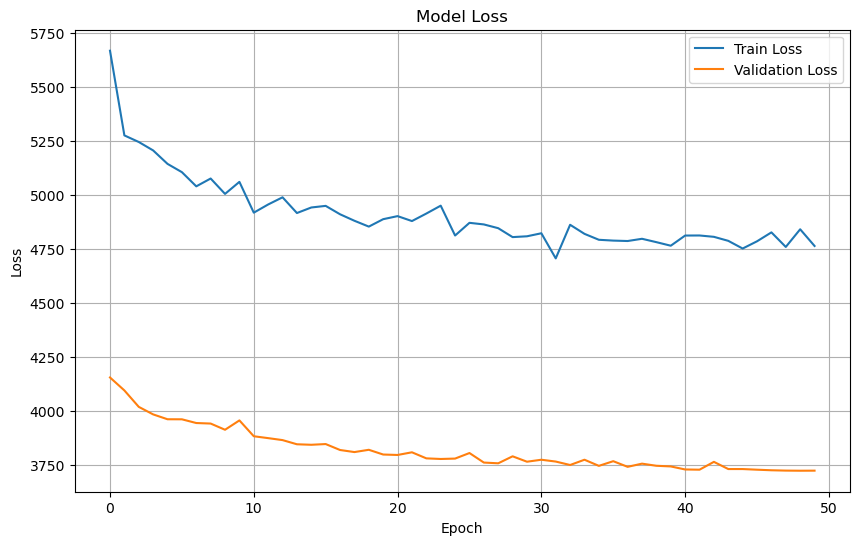

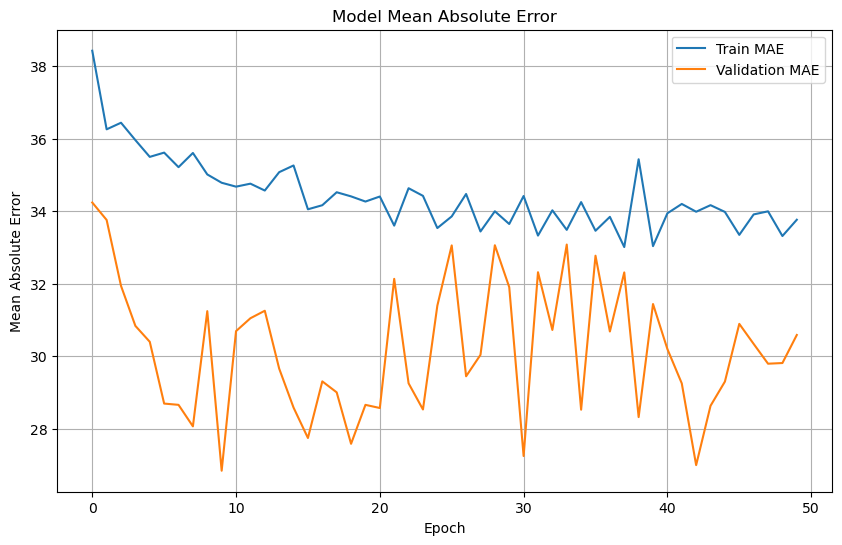

In [40]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Plot training & validation mean absolute error values
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Correlation matrix to visualize relationships between features

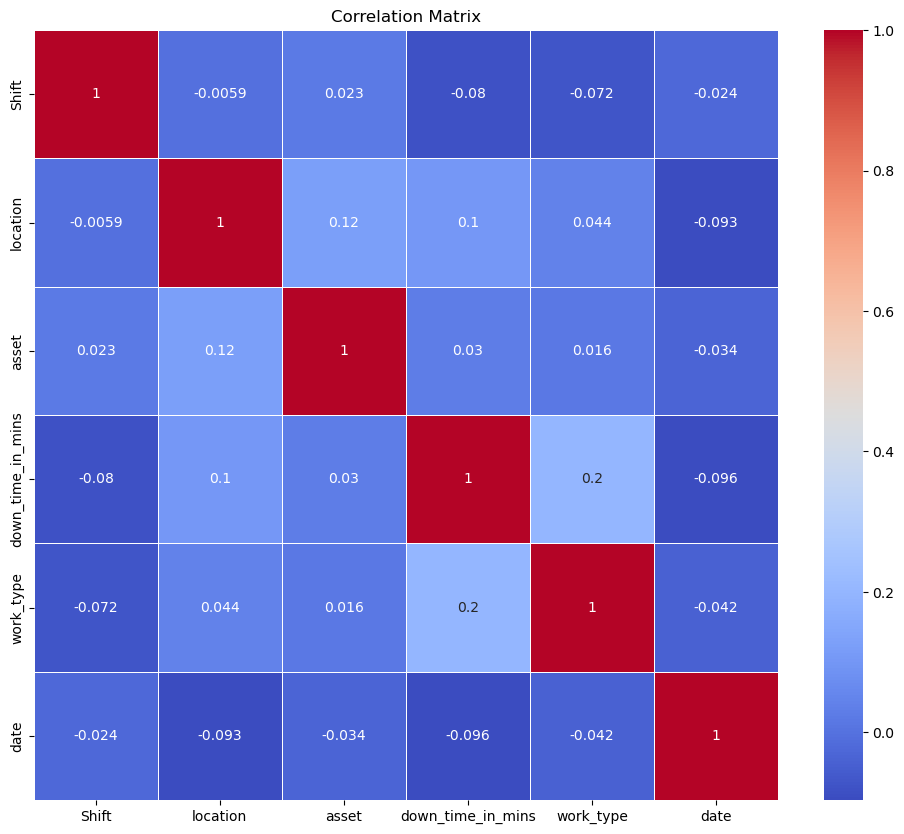

In [41]:
import seaborn as sns

plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Residual plot

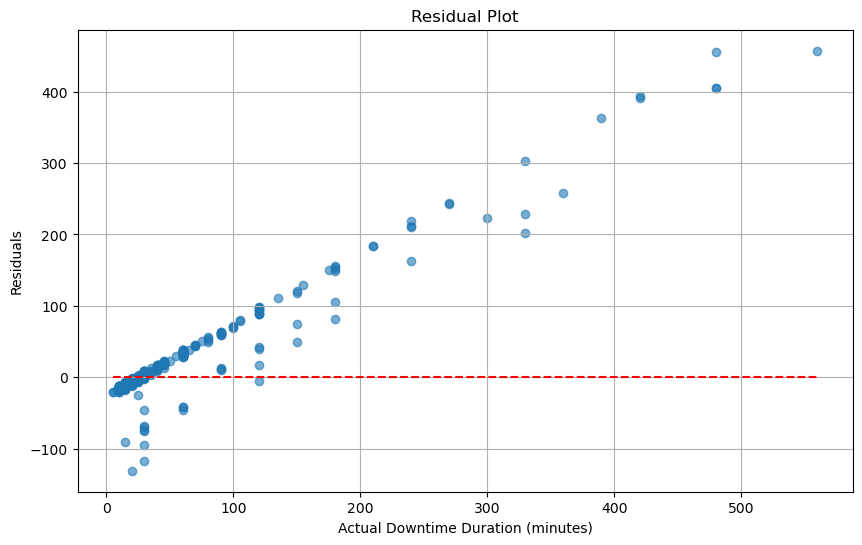

In [42]:

import numpy as np

residuals = y_test - y_pred_dl.flatten()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.6)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Downtime Duration (minutes)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Prediction distribution plot

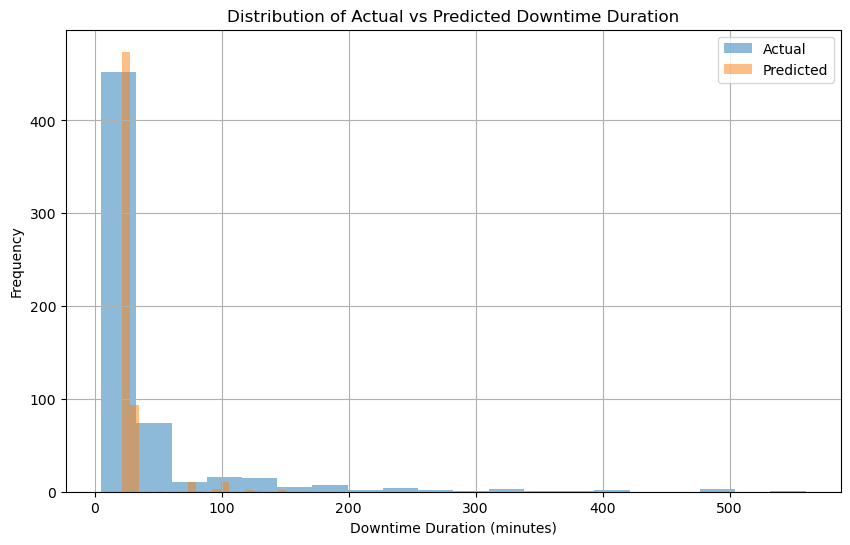

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=20, alpha=0.5, label='Actual')
plt.hist(y_pred_dl.flatten(), bins=20, alpha=0.5, label='Predicted')
plt.xlabel('Downtime Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs Predicted Downtime Duration')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Error distribution plot

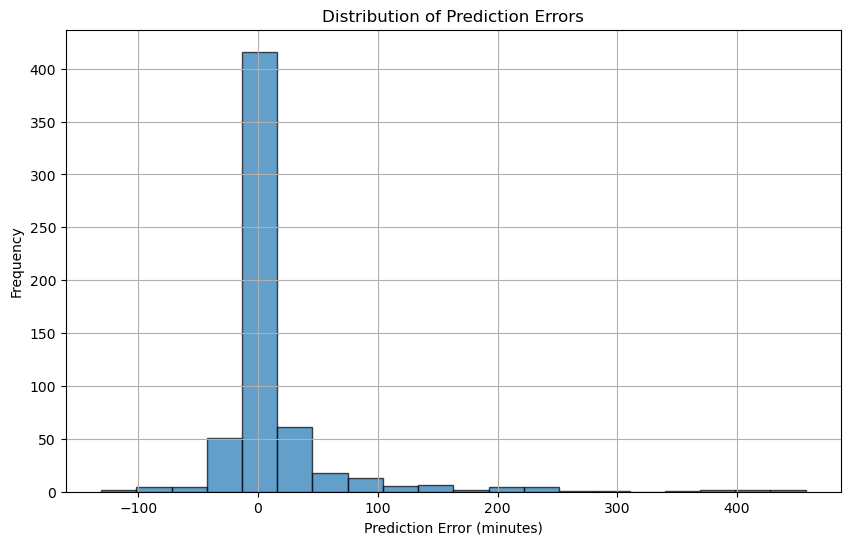

In [44]:
# Plot learningrate
errors = residuals

plt.figure(figsize=(10, 6))
plt.hist(errors, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Prediction Error (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.grid(True)
plt.show()